# Introduction
**Aunalytics - Digital Transformation Through Human Intelligence**


Title: Predicting Financial Outcome <br/>
Prepared by: Zaid M Masri <br/>
Date: Friday, July 17, 2020 <br/>
Version: 0.01 <br/>
Contact: zaidmasri2@gmail.com <br/>


1. Audience:
> This document's primary audience is Aunalytics. Secondary audience members include - but not limited to - data science enthusiast, students, or someone interested in machine learning.
2. Purpose:
> Demonstrate my ability to solve a data science problem using given information and making reasonable assumptions.
3. Subject:
> Predict if someone will make less than or equal to 50,000 USD or more than 50,000 USD a year. 

# Exploring Data & Data Preperation

## Importing Dependeancies

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, log_loss, brier_score_loss


import matplotlib.pyplot as plt

# Omitting warnings 
import warnings
warnings.filterwarnings('ignore')


## Loading .csv file into DataFrame

In [2]:
#Loading data into variable
#In order to train the model to the highest accuracy it would be best to concatinate both datasets and randomize the training model later on
#This ensures that both testing and training data are clean 
au_train = pd.read_csv("/Users/zaidmasri/Documents/Development/Python Projects/Aunalytics/au_train.csv")
au_test = pd.read_csv("/Users/zaidmasri/Documents/Development/Python Projects/Aunalytics/au_test.csv")


dataset = pd.concat([au_train, au_test])

## Exploratory Data Analysis (EDA) & Cleaning

### Observations & Resolutions

1. "class" is a Python reserved word & currently a column name
2. "?" character does not carry the NaN value 
3. Information is not standardized in the "class" column
4. Remove whitespace 

In [3]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


### Data Cleaning

#### Unrecognized NaN Values

In [6]:
dataset[dataset == ' ?'] = np.nan #From NumPy
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    
dataset.tail(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
16261,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K.
16262,51,Private,82720,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
16263,22,Private,269623,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K.
16264,64,Self-emp-not-inc,136405,HS-grad,9,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,32,United-States,<=50K.
16265,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K.
16266,55,Private,224655,HS-grad,9,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,32,United-States,<=50K.
16267,38,Private,247547,Assoc-voc,11,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K.
16268,58,Private,292710,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,36,United-States,<=50K.
16269,32,Private,173449,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K.
16270,48,Private,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.


#### Handling Pre-reserved Word

In [7]:
dataset = dataset.rename(columns={'class':'income'}) #From pandas
dataset.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


#### Unifying Dependent Variable 

In [8]:
dataset['income'] = dataset['income'].str.replace('<=50K.','<=50K')
dataset['income'] = dataset['income'].str.replace('>50K.','>50K')

In [9]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


dataset.tail()

#### Removing Whitespace

In [10]:

for i in ['workclass', 'occupation', 'native-country']:
    dataset[i] = dataset[i].str.lstrip()


#### Confirming dtypes

In [11]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Pickling Clean Data for Later Use

In [12]:
with open('clean_dataset.pkl', 'wb') as pickle_file:
    pickle.dump(dataset,pickle_file)

## Visual Exploration of Clean Data

### Income Bar Chart

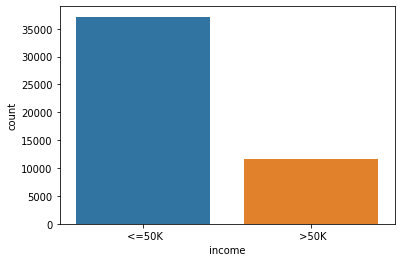

In [13]:
sns.countplot(dataset['income'])

In [14]:
dataset['income'].value_counts()/dataset['income'].count()*100

 <=50K    76.071823
 >50K     23.928177
Name: income, dtype: float64

### Numerical Features Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfc8dba290>,
      dtype=object)

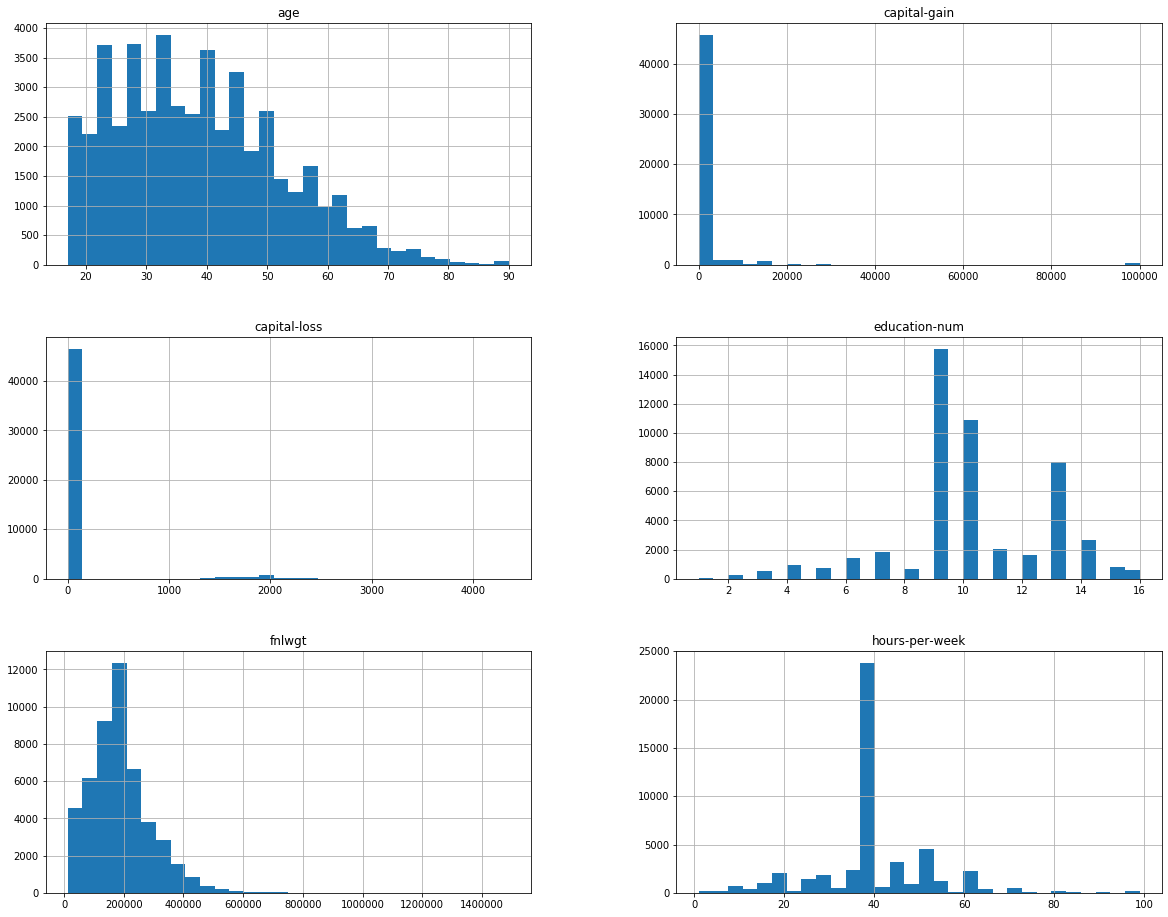

In [15]:
numerical_features = dataset.select_dtypes(include=['int64', 'float64'])
numerical_features.hist(figsize = (20,16),bins = 30)

### Categorical Features Histograms

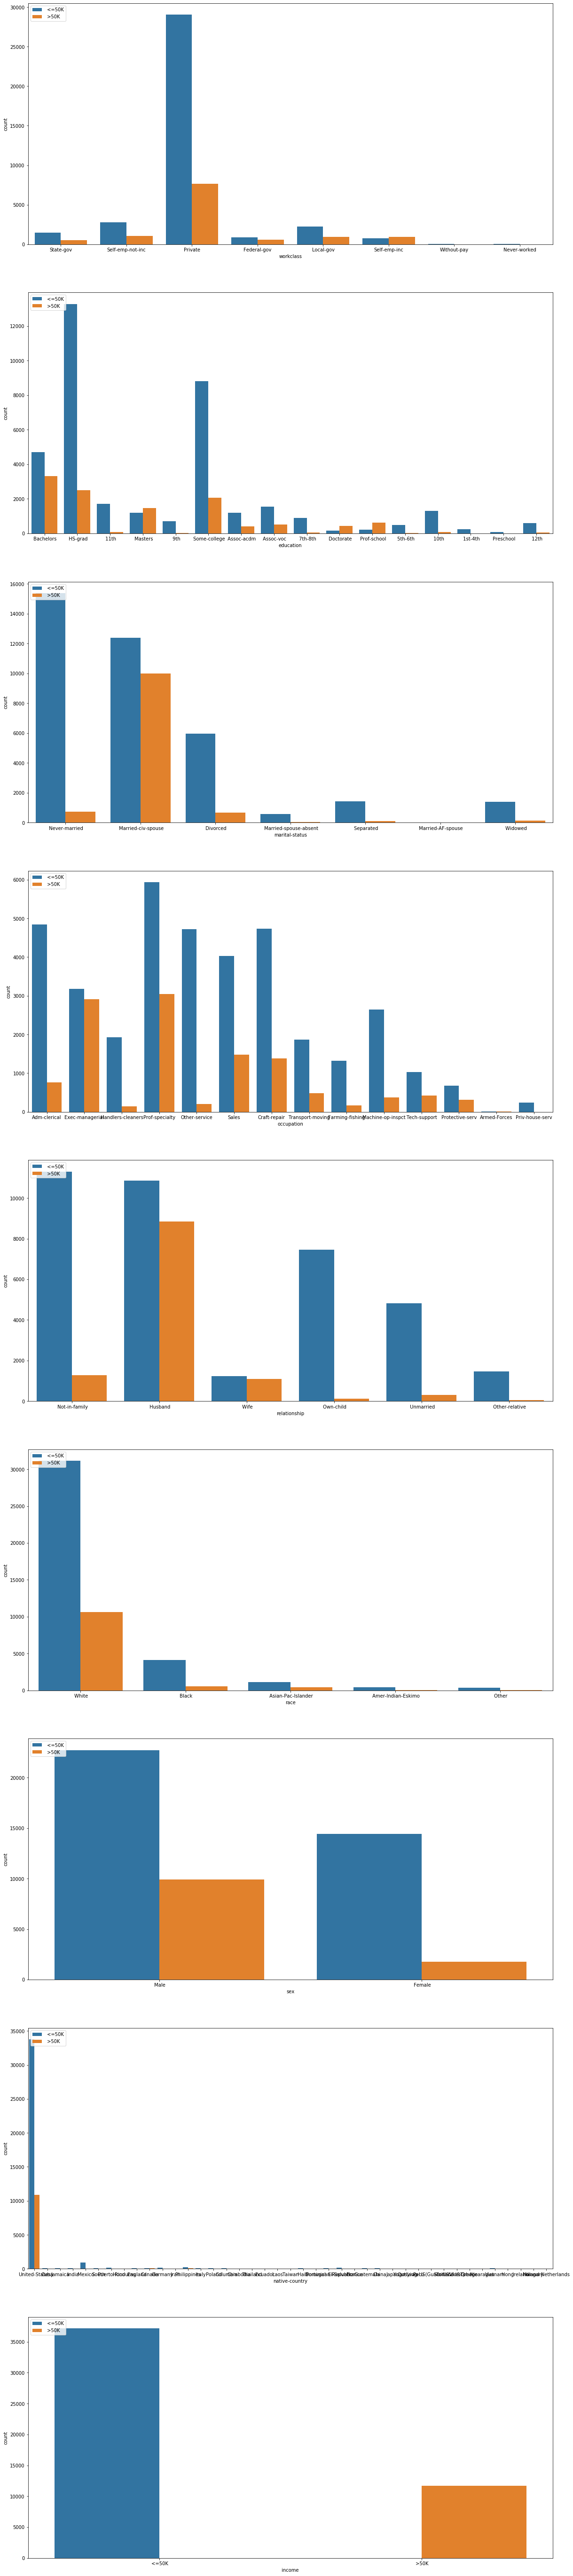

In [16]:
categorical_features = dataset.select_dtypes('object')

fig = plt.figure(figsize = (20,100))
for i,col in enumerate(categorical_features):
    ax1 = fig.add_subplot(9, 1, i+1)
    sns.countplot(dataset[col],hue = dataset['income'])
    plt.legend(loc = 'upper left')

# Model Testing

## Pre-processing

### Feature Selection

In [17]:
dataset['income'].replace(to_replace='<=50K',value=0,inplace=True)
dataset['income'].replace(to_replace='>50K',value=1,inplace=True)

to_drop_cat = []
for i in categorical_features:
    if (dataset[i].value_counts(normalize=True)[0]) > 0.9:
        to_drop_cat.append(i)
        
print(to_drop_cat)


['native-country']


In [18]:
to_drop_num = []
for i in numerical_features:
    if dataset[i].value_counts(normalize = True).iloc[0] > .9:
        to_drop_num.append(i)
print(to_drop_num)

['capital-gain', 'capital-loss']


> Features 'capital-gain' and 'capital-loss' are a kept part of the predictive model due to them being clear determinants of income (yet skewed) 

In [19]:
X = dataset.drop(['income'] + to_drop_cat , axis= 'columns')
y = dataset['income']

### Feature Engineering

#### Workclass 

In [20]:
X['workclass'].value_counts(normalize=True)

Private             0.751505
Self-emp-not-inc    0.079071
Local-gov           0.064207
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

In [21]:
#Listing all options other than private
to_replace = list(X['workclass'].unique())
to_replace.remove('Private')

#Placing all other categories under one bracket
X.replace(to_replace,'Non-Private',inplace=True)
X['workclass'].value_counts(normalize=True)

Private        0.751505
Non-Private    0.248495
Name: workclass, dtype: float64

#### Race

In [22]:
X['race'].value_counts(normalize=True)

 White                 0.855043
 Black                 0.095922
 Asian-Pac-Islander    0.031100
 Amer-Indian-Eskimo    0.009623
 Other                 0.008313
Name: race, dtype: float64

In [23]:
#Listing all options other than white
to_replace = list(X['race'].unique())
to_replace.remove(' White')

#Placing all other categories under one bracket
X.replace(to_replace,' Other',inplace=True)
X['race'].value_counts(normalize=True)

 White    0.855043
 Other    0.144957
Name: race, dtype: float64

#### Marital Status 

In [24]:
X['marital-status'].value_counts(normalize=True)

 Married-civ-spouse       0.458192
 Never-married            0.329982
 Divorced                 0.135805
 Separated                0.031325
 Widowed                  0.031080
 Married-spouse-absent    0.012858
 Married-AF-spouse        0.000758
Name: marital-status, dtype: float64

In [25]:
to_replace = list(X['marital-status'].unique())
to_replace.remove(' Never-married')

X.replace(to_replace, ' Married', inplace= True)

X['marital-status'].value_counts(normalize=True)

 Married          0.670018
 Never-married    0.329982
Name: marital-status, dtype: float64

In [30]:
seed = 10
#Random Forest
num_trees = 100
max_features = 3


# K-Fold Cross Validation

> K-Fold Cross Validation (10-Fold Cross Validation)

In [149]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.833556 (0.006436)
KNN: 0.823592 (0.005547)
RF: 0.854659 (0.005166)


# Random Forest Classifier

### Label Encoding

In [31]:
#Splitting Data
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for i in categorical:
        le = preprocessing.LabelEncoder()
        X[i] = le.fit_transform(X[i])
        X_test[i] = le.transform(X_test[i])

## Random Forest Classifier Accuracy

In [36]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8492342969453771


## Random Forest Classifier Confusion Matrix

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8589  677]
 [1164 1781]]


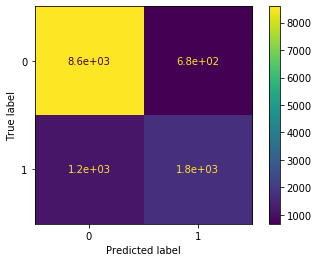

In [38]:
cm_display = ConfusionMatrixDisplay(cm, ['0', '1'] ).plot()

## Random Forest Classifier AUC ROC Curve

In [39]:
rf_roc = roc_auc_score(y_test,rf_y_pred[:,-1])
print("Random Forest Classifier ROC Score: ", rf_roc)


Random Forest Classifier ROC Score:  0.9007791964122444


# K-Neighbors Classifier

### Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## K-Neighbors Classifier Accuracy

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=seed)
knn.fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_y_pred))

Accuracy: 0.8309720743591843


## K-Neighbor Classifier Confusion Matrix

In [128]:
cm = confusion_matrix(y_test, knn_y_pred)
print(cm)

[[8645  621]
 [1443 1502]]


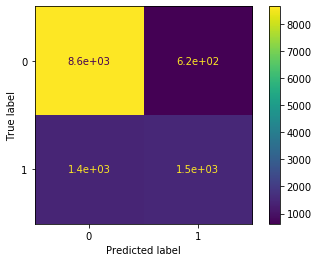

In [129]:
cm_display = ConfusionMatrixDisplay(cm, ['0', '1'] ).plot()

## K-Neigbhor Classifier AUC ROC Curve

# Logistic Regression Classifier

## Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
logreg_y_pred=logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, logreg_y_pred))

Accuracy: 0.8318729014822701


## Logistic Regression Confusion Matrix

In [156]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[8665  601]
 [1452 1493]]


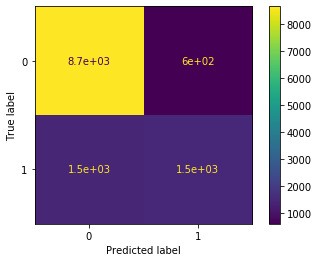

In [157]:
cm_display = ConfusionMatrixDisplay(cm, ['0', '1'] ).plot()

## Logistic Regression AUC ROC Curve

In [158]:

log = LogisticRegression(random_state=seed)
log.fit(X_train,y_train)
log_y_pred = log.predict_proba(X_test)
log_roc = roc_auc_score(y_test,log_y_pred[:,-1])
print('ROC AUC score : ',log_roc)


ROC AUC score :  0.8676634221831498
